# EASC 305: Timeseries 

In [1]:
%matplotlib notebook 

import numpy as np 
import matplotlib.pyplot as plt 

# Demo 1: Waveforms and aliasing 

In [2]:
N      = 1024                                  # number of points in vector
tmin   = 0.                                    # t_0: inital time 
tmax   = 100.                                  # t_N: final time 
t,dt   = np.linspace(tmin,tmax,N,retstep=True) # create the time vector 
f_samp = 1/dt                                  # sampling frequency

Create, sum, plot sine waves  

In [3]:
y1   = np.sin(2*np.pi*t/20.)     # create synthetic sinusoid
y2   = np.sin(2*np.pi*t/10.)     # create synthetic sinusoid
y3   = np.sin(2*np.pi*t/5.)      # create synthetic sinusoid
y4   = np.sin(2*np.pi*t/2.)      # create synthetic sinusoid
ysum = y1 + y2 + y3 + y4         # sum sinusoids to create waveform

<IPython.core.display.Javascript object>


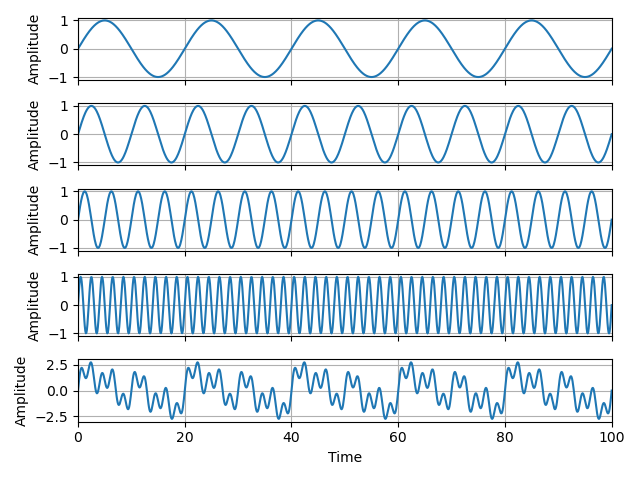

In [4]:
fig, ax = plt.subplots(5,1,sharex=True)

ax[0].plot(t,y1)
ax[1].plot(t,y2)
ax[2].plot(t,y3)
ax[3].plot(t,y4)
ax[4].plot(t,ysum)

ax[4].set_xlim(tmin,tmax);

ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].set_ylabel('Amplitude'); ax[1].grid(True)
ax[2].set_ylabel('Amplitude'); ax[2].grid(True)
ax[3].set_ylabel('Amplitude'); ax[3].grid(True)
ax[4].set_ylabel('Amplitude'); ax[4].grid(True)
ax[4].set_xlabel('Time');

fig.tight_layout()

Sample waveform at 0.5 Hz (highest frequency component in original signal) and 1.0 Hz (twice the highest frequency component). 

In [5]:
# Sample original waveform at 0.5 (Hz, if time in seconds)
fnewsample1 = 0.5
dtnew1      = 1/fnewsample1

tnew1       = np.arange(tmin,tmax,dtnew1)

y1new1   = np.sin(2*np.pi*tnew1/20.)     # create synthetic sinusoid
y2new1   = np.sin(2*np.pi*tnew1/10.)     # create synthetic sinusoid
y3new1   = np.sin(2*np.pi*tnew1/5.)      # create synthetic sinusoid
y4new1   = np.sin(2*np.pi*tnew1/2.)      # create synthetic sinusoid
y5new1   = y1new1+y2new1+y3new1+y4new1   # sum sinusoids to create waveform

In [6]:
# Sample original waveform at 1.0 (Hz, if time in seconds)
fnewsample2 = 1.0
dtnew2      = 1/fnewsample2

tnew2       = np.arange(tmin,tmax,dtnew2)

y1new2   = np.sin(2*np.pi*tnew2/20.)     # create synthetic sinusoid
y2new2   = np.sin(2*np.pi*tnew2/10.)     # create synthetic sinusoid
y3new2   = np.sin(2*np.pi*tnew2/5.)      # create synthetic sinusoid
y4new2   = np.sin(2*np.pi*tnew2/2.)      # create synthetic sinusoid
y5new2   = y1new2+y2new2+y3new2+y4new2   # sum sinusoids to create waveform

<IPython.core.display.Javascript object>


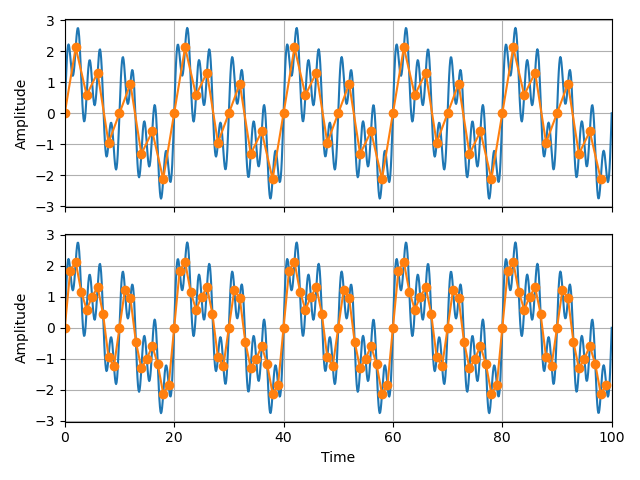

In [7]:
# Plot the original and resampled waveforms
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(t,ysum)
ax[0].plot(tnew1,y5new1,'-o')

ax[1].plot(t,ysum)
ax[1].plot(tnew2,y5new2,'-o')

ax[1].set_xlim(tmin,tmax)
fig.tight_layout();

ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].set_ylabel('Amplitude'); ax[1].grid(True)
ax[1].set_xlabel('Time');

fig.tight_layout()

# Demo 2: Fourier Analysis 

Create a square wave from a series of sinusoids (illustrate Fourier):

$$
y = \sum^\infty_{k=0} \frac{\sin\left((2k+1) \pi  t \right)}{2k+1}
$$

In [8]:
# Create and sum 5 synthetic sinusoids in series used to make square wave

t10, dt10 = np.linspace(0,4,1025,retstep=True)
f10_samp  = 1/dt10

y10  = np.sin(1.*np.pi*t10)/1.         # create synthetic sinusoid
y30  = np.sin(3.*np.pi*t10)/3.         # create synthetic sinusoid
y50  = np.sin(5.*np.pi*t10)/5.         # create synthetic sinusoid
y70  = np.sin(7.*np.pi*t10)/7.         # create synthetic sinusoid
y90  = np.sin(9.*np.pi*t10)/9.         # create synthetic sinusoid
ysum = y10+y30+y50+y70+y90             # sum sinusoids to create waveform

<IPython.core.display.Javascript object>


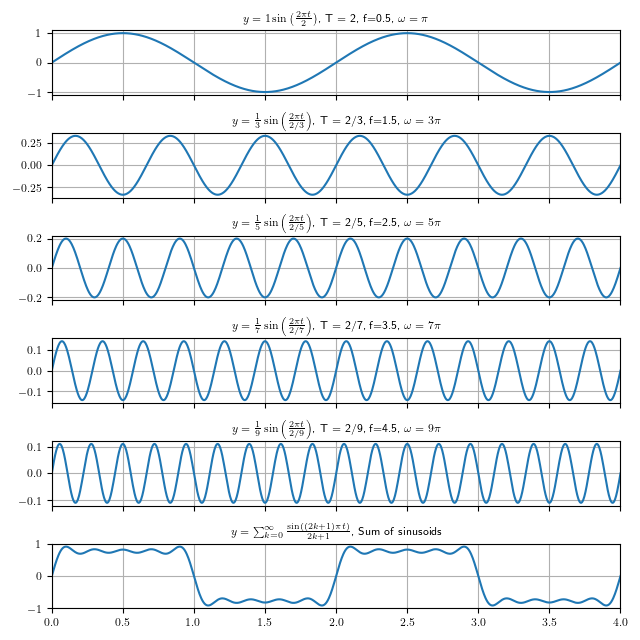

In [9]:
# Plot the results with nice latex labels

plt.rcParams['text.usetex'] = True

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, ax = plt.subplots(6,1,figsize=(6.4,6.4),sharex=True)

ax[0].plot(t10,y10); ax[0].grid(True)
ax[0].set_title(r'$y = 1 \sin\left( \frac{2 \pi t}{2} \right)$, T = 2,   f=0.5, $\omega=\pi$')
ax[1].plot(t10,y30); ax[1].grid(True)
ax[1].set_title(r'$y = \frac{1}{3} \sin\left( \frac{2 \pi t}{2/3} \right)$, T = 2/3, f=1.5, $\omega=3\pi$')
ax[2].plot(t10,y50); ax[2].grid(True)
ax[2].set_title(r'$y = \frac{1}{5} \sin\left( \frac{2 \pi t}{2/5} \right)$, T = 2/5, f=2.5, $\omega=5\pi$')
ax[3].plot(t10,y70); ax[3].grid(True)
ax[3].set_title(r'$y = \frac{1}{7} \sin\left( \frac{2 \pi t}{2/7} \right)$, T = 2/7, f=3.5, $\omega=7\pi$')
ax[4].plot(t10,y90); ax[4].grid(True)
ax[4].set_title(r'$y = \frac{1}{9} \sin\left( \frac{2 \pi t}{2/9} \right)$, T = 2/9, f=4.5, $\omega=9\pi$')

ax[5].plot(t10,ysum); ax[5].grid(True)
ax[5].set_title(r'$y = \sum^\infty_{k=0} \frac{\sin\left((2k+1) \pi  t \right)}{2k+1}$, Sum of sinusoids')

ax[0].set_xlim(0,4)

fig.tight_layout();

Let's demonstrate that square wave emerges with larger number of terms:  
$$
y = \sum^\infty_{k=0} \frac{\sin\left((2k+1) \pi  t \right)}{2k+1}
$$

<IPython.core.display.Javascript object>


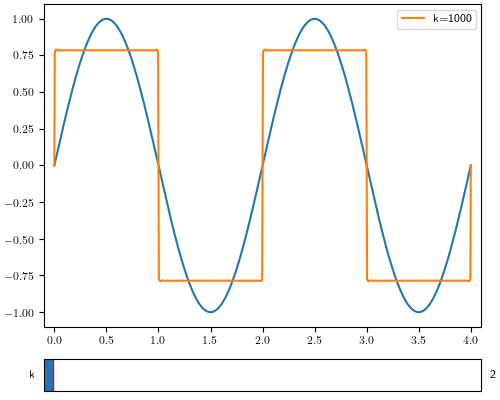

In [10]:
# Use the slider bar in the figure to select different values of k


from matplotlib.widgets import Slider
import matplotlib.gridspec as gridspec

fig0  = plt.figure(figsize=(5,4),constrained_layout=True)
spec0 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig0, height_ratios=[1,0.1])
ax0   = fig0.add_subplot(spec0[0])
ax1   = fig0.add_subplot(spec0[1])
ax    = [ax0,ax1]

k_min  = 1.    # the minimial value of the paramater a
k_max  = 51.   # the maximal value of the paramater a
k_init = 2.    # the value of the parameter a to be used initially, when the graph is created

# Compute the series using vectorization and broadcasting 
js    = np.arange(0,1001).reshape(-1,1)
ysums = np.cumsum(np.sin((2*js+1)*np.pi*t10)/(2*js+1), axis=0)

y0       = np.sin((2*(2+1))*np.pi*t10)/(2*(2+1))
fourier, = ax[0].plot(t10,ysums[0])
ax[0].set_xlim(-0.1,4.1)
ax[0].set_ylim(-1.1,1.1)

# plot the 1001-th item in the seires
ax[0].plot(t10,ysums[-1],label='k=1000')
ax[0].legend()

# here we create the slider
k_slider = Slider(ax[1],          # the axes object containing the slider
                  'k',            # the name of the slider parameter
                  k_min,          # minimal value of the parameter
                  k_max,          # maximal value of the parameter
                  valinit=k_init, # initial value of the parameter
                  valstep=1.0,    # force discrete step in parameter,
                  valfmt='%2.0f'
                 )

def update(k):
    i = int(k-1) 
    fourier.set_ydata(ysums[i])     # set new y-coordinates of the plotted points
    fig0.canvas.draw_idle()         # redraw the plot
    
k_slider.on_changed(update);

# Demo 3: Amplitude and Power Spectra 

In [11]:
# Signal Processing Toolbox
import scipy.signal as signal 

In [12]:
N      = 1024                                  # number of points in vector
tmin   = 0.                                    # t_0: inital time 
tmax   = 100.                                  # t_N: final time 
t,dt   = np.linspace(tmin,tmax,N,retstep=True) # create the time vector 
f_samp = 1/dt                                  # sampling frequency

In [13]:
y1   = np.sin(2*np.pi*t/20.)     # create synthetic sinusoid
y2   = np.sin(2*np.pi*t/10.)     # create synthetic sinusoid
y3   = np.sin(2*np.pi*t/5.)      # create synthetic sinusoid
y4   = np.sin(2*np.pi*t/2.)      # create synthetic sinusoid
ysum = y1 + y2 + y3 + y4         # sum sinusoids to create waveform

<IPython.core.display.Javascript object>


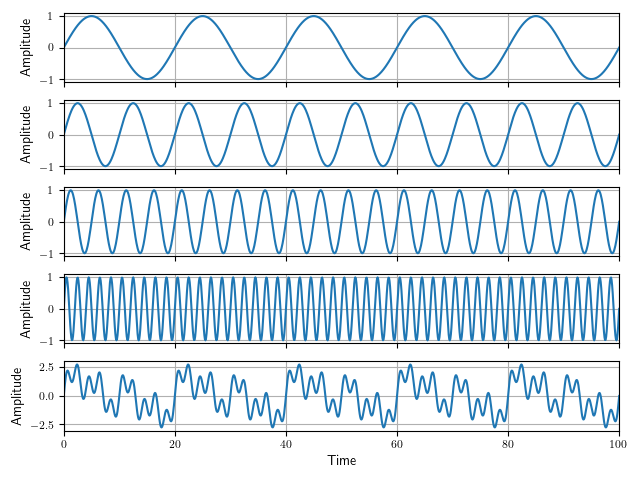

In [14]:
fig, ax = plt.subplots(5,1,sharex=True)

ax[0].plot(t,y1)
ax[1].plot(t,y2)
ax[2].plot(t,y3)
ax[3].plot(t,y4)
ax[4].plot(t,ysum)

ax[4].set_xlim(tmin,tmax);

ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].set_ylabel('Amplitude'); ax[1].grid(True)
ax[2].set_ylabel('Amplitude'); ax[2].grid(True)
ax[3].set_ylabel('Amplitude'); ax[3].grid(True)
ax[4].set_ylabel('Amplitude'); ax[4].grid(True)
ax[4].set_xlabel('Time');

fig.tight_layout()

In [15]:
# Compute power spectrum
# Inputs: timeseries y(t), sampling frequency, length of FFT
# Outputs: vector of frequencies, power

f, pxx = signal.periodogram(y1,fs=f_samp,nfft=N)

<IPython.core.display.Javascript object>


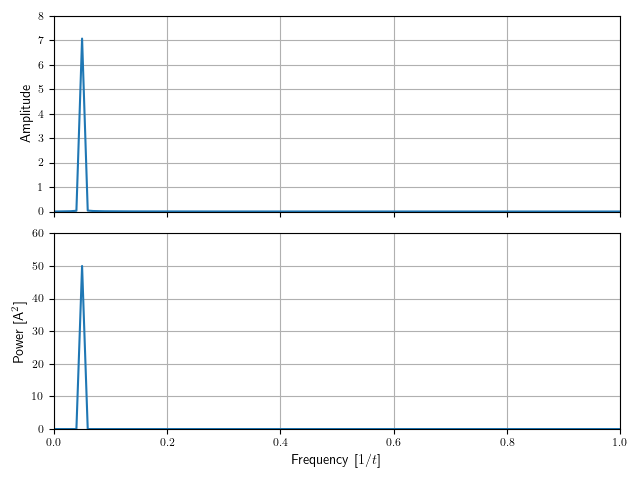

In [16]:
# Plot amplitude and power spectra
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(f,np.sqrt(pxx))
ax[1].plot(f,pxx)

# Set axis limits
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,8)
ax[1].set_ylim(0,60)

ax[0].set_ylabel('Amplitude'); 
ax[0].grid(True)
ax[1].set_ylabel('Power [A$^2$]'); 
ax[1].grid(True)
ax[1].set_xlabel('Frequency [$1/t$]');

fig.tight_layout()

In [17]:
N      = 1024                                  # number of points in vector
tmin   = 0.                                    # t_0: inital time 
tmax   = 100.                                  # t_N: final time 
t,dt   = np.linspace(tmin,tmax,N,retstep=True) # create the time vector 
f_samp = 1/dt                                  # sampling frequency

In [18]:
# Create synthetic data
y2   = np.sin(2*np.pi*t/10.)     # create synthetic sinusoid
y3   = np.sin(2*np.pi*t/5.)      # create synthetic sinusoid
y4   = np.sin(2*np.pi*t/2.)      # create synthetic sinusoid
y5   = y2 + y3 + y4              # sum sinusoids to create waveform
ys   = [y2,y3,y4,y5]             # make a list of the y-data to be indexed

# Compute power spectra
f2, pxx2 = signal.periodogram(y2,fs=f_samp,nfft=N)
f3, pxx3 = signal.periodogram(y3,fs=f_samp,nfft=N)
f4, pxx4 = signal.periodogram(y4,fs=f_samp,nfft=N)
f5, pxx5 = signal.periodogram(y5,fs=f_samp,nfft=N)
fs       = [f2,f3,f4,f5]
pxxsc    = [pxx2,pxx3,pxx4,pxx5]

<IPython.core.display.Javascript object>


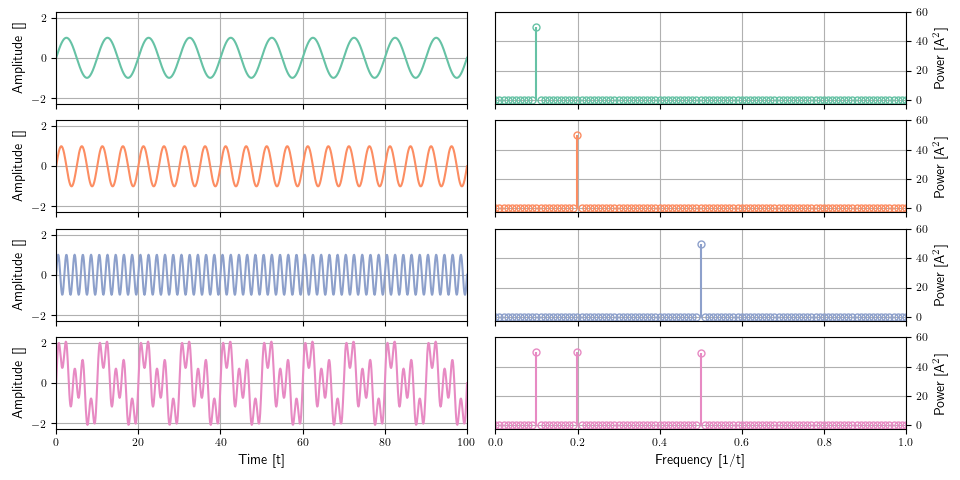

In [19]:
# Plot original timeseries and power spectra

fig, ax = plt.subplots(4,2,sharex='col',sharey='col',figsize=(9.6,4.8))
color = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3']
for i in range(0,4): 
    ax[i,0].plot(t, ys[i],c=color[i])
    ax[i,0].set_xlim(tmin,tmax)
    ax[i,0].set_ylabel('Amplitude []')
    ax[i,0].grid(True)

    (markers, stemlines, baseline) = ax[i,1].stem(fs[i], pxxsc[i],basefmt='None')
    plt.setp(markers, marker='o', markersize=5.0, markerfacecolor='None',markeredgecolor=color[i])
    plt.setp(stemlines, color=color[i])

    ax[i,1].set_xlim(0,1)
    ax[i,1].set_ylim(None,60)
    ax[i,1].yaxis.tick_right()
    ax[i,1].yaxis.set_label_position("right")
    ax[i,1].set_ylabel('Power [A$^2$]')
    ax[i,1].grid(True)

ax[-1,0].set_xlabel('Time [t]')
ax[-1,1].set_xlabel('Frequency [1/t]')
plt.tight_layout()

Verify that power spectral density calculation is correct by integrating square of the wave amplitude over time (Parsival's theorem):

In [20]:
total_power_Py2   = dt*sum(y2**2)
total_power_Py3   = dt*sum(y3**2)
total_power_Py4   = dt*sum(y4**2)
total_power_Py5   = dt*sum(y5**2)

print(total_power_Py2)
print(total_power_Py3)
print(total_power_Py4)
print(total_power_Py5)

50.00000000000005
50.000000000000036
50.00000000000004
150.00000000000006


# Demo 4: The fast Fourier Transform (fft)

We'll be using the real meteorological data from last week.

In [21]:
# Load air temperature timeseries 
T_DR_num  = np.loadtxt('T_DR_num.txt',skiprows=1,delimiter=',')

In [22]:
# Assign time vector and downsample data for manageability 
tAT = T_DR_num[::12,0] - T_DR_num[:,0].min()
AT  = T_DR_num[::12,1]                       

In [23]:
# Subset the data
tAT = tAT[:2**16]
AT  =  AT[:2**16]

In [24]:
# Calculate the autocorrelation from last week

N  = tAT.shape[0]          # calculate length of record
dt = tAT[1] - tAT[0]       # sampling interval (d)
df = 1/dt                  # sampling frequency (1/d)
  
lag_initial  = 0;          # set min lag to zero
lag_interval = 10;         # set lag interval in days
lag_final    = tAT[-1]/4   # set max lag relative to data length
lag_vec      = np.arange(lag_initial,lag_final,lag_interval)   # create vector of lags

# Create vector of time indices representing closest match to specified lags

values       = np.expand_dims(lag_vec, axis=-1) 
lag_idx      = np.abs(tAT - values).argmin(axis=-1)

ATmean       = AT.mean()   # Calculate sample mean
ATvar        = AT.var()    # calculate sample variance

# Compute the autocorrelation and add to an empty vector
autocorr     = np.zeros(lag_vec.shape[0])
for i in range(0,len(lag_idx)): 
    y1 = AT[lag_idx[i]:]      # truncate original timeseries
    
    if i == 0: 
        y2 = AT.copy()        # truncate moving timeseries
    else: 
        y2 = AT[:-lag_idx[i]] # truncate moving timeseries
    
    k  = lag_idx[i] - 1
    autocorr[i] = np.sum( (y1-ATmean)*(y2-ATmean) )/(N-1-k)/ATvar    

<IPython.core.display.Javascript object>


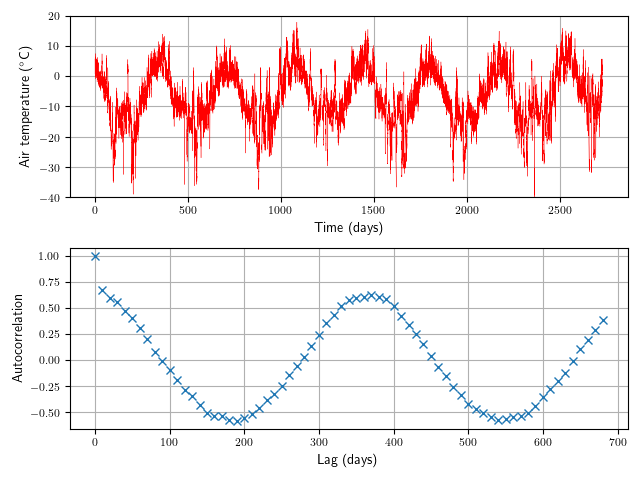

In [25]:
# Plot timeseries and autocorrelation

fig, ax = plt.subplots(2,1)

ax[0].plot(tAT,AT,'r',lw=0.25,label='temperature')
ax[0].set_ylim(-40,20)
ax[0].set_ylabel('Air temperature ($^{\circ}$C)')
ax[0].set_xlabel('Time (days)')
#ax[0].legend()
ax[0].grid(True)

ax[1].plot(lag_vec,autocorr,'x')
ax[1].set_ylabel('Autocorrelation')
ax[1].set_xlabel('Lag (days)')
ax[1].grid(True)

fig.tight_layout();

## Compute Fast Fourier Transform (FFT)

In [26]:
import scipy

FFT_AT = scipy.fft.fft(AT)/N  # compute fft
an     = np.real(FFT_AT)      # extract a_n
bn     = np.imag(FFT_AT)      # extract b_n
amp    = np.sqrt(an**2+bn**2) # extract amplitude
power  = an**2+bn**2          # extract power
phase  = np.arctan(bn/an)     # extract phase 

In [27]:
# Construct frequency vector for single-sided spectrum (up to element N/2+1) 
fout = (df/2)*np.linspace(0,1,int(N/2+1))    # df/2 = Nyquist frequency

<IPython.core.display.Javascript object>


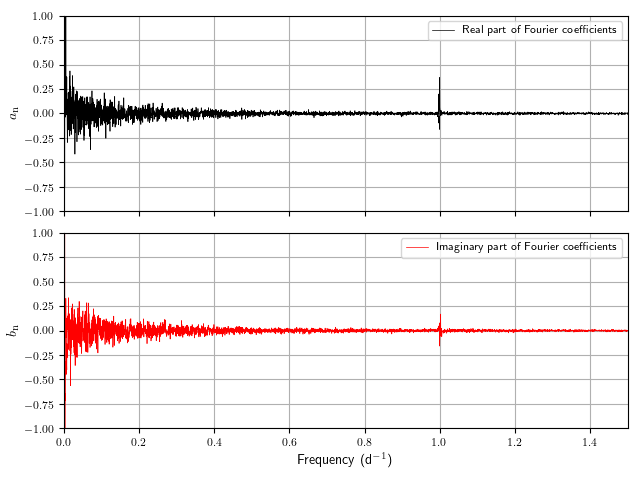

In [28]:
# Plot coefficients a_n and b_n

fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(fout,an[:int(N/2+1)],'k',lw=0.5,label='Real part of Fourier coefficients')
ax[0].set_ylim(-1,1)
ax[0].set_xlim(0,1.5)
ax[0].set_ylabel('$a_{\\rm n}$')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(fout,bn[:int(N/2+1)],'r',lw=0.5,label='Imaginary part of Fourier coefficients')
ax[1].set_ylim(-1,1)
ax[1].set_xlim(0,1.5)
ax[1].set_ylabel('$b_{\\rm n}$')
ax[1].set_xlabel('Frequency (d$^{-1}$)')
ax[1].legend()
ax[1].grid(True);

fig.tight_layout()

<IPython.core.display.Javascript object>


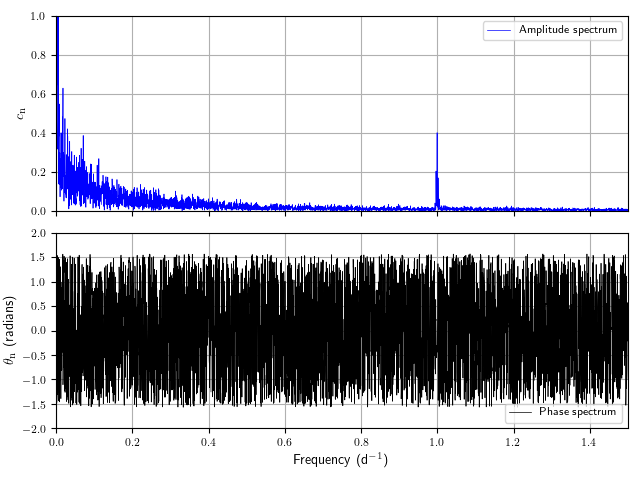

In [29]:
# Plot amplitude c_n and phase phi

fig, ax = plt.subplots(2,1,sharex=True)

ax[0].plot(fout,amp[:int(N/2+1)],'b',lw=0.5,label='Amplitude spectrum')
ax[0].set_ylim(0,1)
ax[0].set_xlim(0,1.5)
ax[0].set_ylabel('$c_{\\rm n}$')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(fout,phase[:int(N/2+1)],'k',lw=0.5,label='Phase spectrum')
ax[1].set_ylim(-2,2)
ax[1].set_xlim(0,1.5)
ax[1].set_ylabel('$\\theta_{\\rm n}$ (radians)')
ax[1].set_xlabel('Frequency (d$^{-1}$)')
ax[1].legend()
ax[1].grid(True)

fig.tight_layout();

<IPython.core.display.Javascript object>


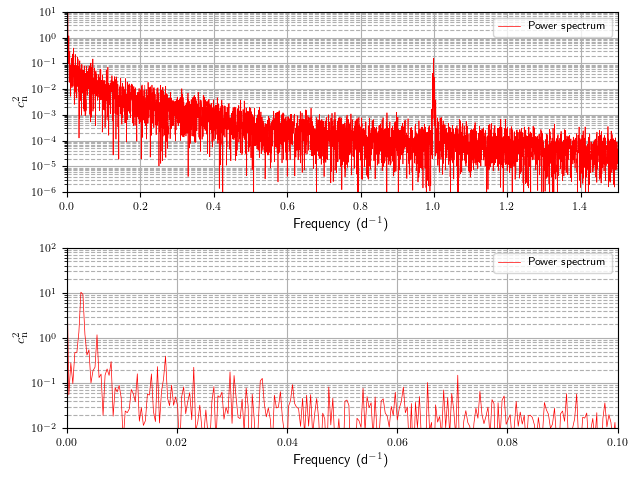

In [30]:
# Plot power spectrum (full and zoomed)

fig, ax = plt.subplots(2,1)

ax[0].semilogy(fout,power[:int(N/2+1)],'r',lw=0.5,label='Power spectrum')
ax[0].set_ylim(1e-6, 1e1)
ax[0].set_xlim(0,1.5)
ax[0].set_ylabel('$c_{\\rm n}^2$')
ax[0].set_xlabel('Frequency (d$^{-1}$)')

ax[0].legend()
ax[0].grid(True)
ax[0].grid(which='minor', linestyle='--')

ax[1].semilogy(fout,power[:int(N/2+1)],'r',lw=0.5,label='Power spectrum')
ax[1].set_ylim(1e-2, 1e2)
ax[1].set_xlim(0,0.1)
ax[1].set_ylabel('$c_{\\rm n}^2$')
ax[1].set_xlabel('Frequency (d$^{-1}$)')
ax[1].legend()
ax[1].grid(True)
ax[1].grid(which='minor', linestyle='--')

fig.tight_layout()

Compute power spectrum of air temp data with `signal.periodogram`

In [89]:
import scipy.signal as signal 
f, pxx = signal.periodogram(AT, fs=df, scaling='density')

<IPython.core.display.Javascript object>


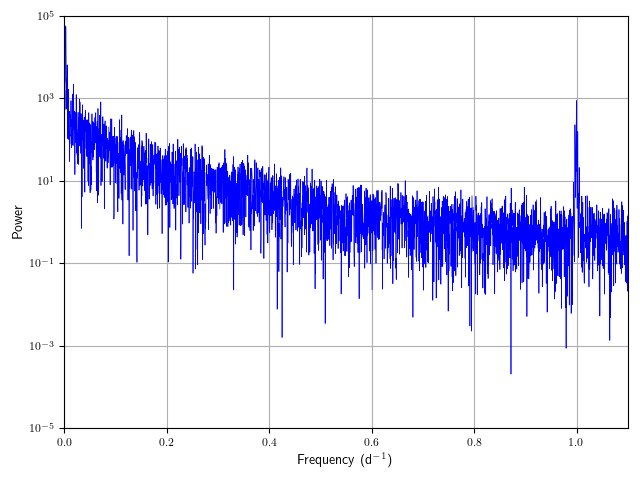

In [91]:
fig, ax = plt.subplots(1,1)

ax.semilogy(f,pxx,'b',lw=0.5)
#ax.plot(f,pxx,'b',lw=0.5)

ax.set_xlim(0, 1.1)
ax.set_ylim(1e-5,1e5)
ax.grid(True)
ax.grid(which='minor', linestyle='--')

ax.set_xlabel('Frequency (d$^{-1}$)')
ax.set_ylabel('Power');  

fig.tight_layout()

In [92]:
# Compute total power in original timeseries
TP_AT      = dt*np.sum(AT**2) 
# Compute total power from PSD function pxx
TP_AT_perd = np.sum(pxx)
# Compute total power from Fourier decomposition
TP_AT_fft  =  N*np.sum(power)/df  

print(TP_AT)
print(TP_AT_perd)
print(TP_AT_fft)

358549.37620026345
218654.56903918492
358549.3762002634
